In [2]:
import pandas as pd
import env
import numpy as np
from pydataset import data
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import acquire
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [2]:
df_iris=data('iris')

In [3]:
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [4]:
df_iris.shape

(150, 5)

In [5]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [6]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [7]:
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# exercise5

In [9]:
df_google='https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
df_google_csv = df_google.replace('/edit#gid=', '/export?format=csv&gid=')
df_google_csv = pd.read_csv(df_google_csv)

In [10]:
df_google_csv.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [11]:
df_google_csv.shape

(891, 12)

In [12]:
df_google_csv.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
df_google_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
df_ = df_google_csv.select_dtypes(exclude=['int', 'float'])


In [15]:
df_unique = df_google_csv.select_dtypes(exclude=['int', 'float']).nunique().to_frame().reset_index()
df_unique.columns = ['Variable','DistinctCount']
df_unique

,Variable,DistinctCount
0,Name,891
1,Sex,2
2,Ticket,681
3,Cabin,147
4,Embarked,3


In [16]:
# problem6

In [17]:
df_excel= pd.read_excel(io='~/Downloads/Excel_Exercises.xlsx')

In [18]:
df_excel.sample=df_excel.head(100)
df_excel.sample

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0.0,Yes,Yes,1.0,1.0,1.0,Mailed check,65.60,593.30,No
1,0003-MKNFE,Male,0.0,No,No,2.0,1.0,0.0,Mailed check,59.90,542.40,No
2,0004-TLHLJ,Male,0.0,No,No,1.0,2.0,0.0,Electronic check,73.90,280.85,Yes
3,0011-IGKFF,Male,1.0,Yes,No,1.0,2.0,0.0,Electronic check,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1.0,Yes,No,1.0,2.0,0.0,Mailed check,83.90,267.40,Yes
5,0013-MHZWF,Female,0.0,No,Yes,1.0,1.0,0.0,Credit card (automatic),69.40,571.45,No
6,0013-SMEOE,Female,1.0,Yes,No,1.0,2.0,2.0,Bank transfer (automatic),109.70,7904.25,No
7,0014-BMAQU,Male,0.0,Yes,No,2.0,2.0,2.0,Credit card (automatic),84.65,5377.80,No
8,0015-UOCOJ,Female,1.0,No,No,1.0,1.0,0.0,Electronic check,48.20,340.35,No
9,0016-QLJIS,Female,0.0,Yes,Yes,2.0,1.0,2.0,Mailed check,90.45,5957.90,No


In [19]:
df_excel.shape

(7049, 12)

In [20]:
df_excel.columns[0:4]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner'], dtype='object')

In [21]:
df_excel.select_dtypes(include=['object'])

,customer_id,gender,partner,dependents,payment_type,churn
0,0002-ORFBO,Female,Yes,Yes,Mailed check,No
1,0003-MKNFE,Male,No,No,Mailed check,No
2,0004-TLHLJ,Male,No,No,Electronic check,Yes
3,0011-IGKFF,Male,Yes,No,Electronic check,Yes
4,0013-EXCHZ,Female,Yes,No,Mailed check,Yes
...,...,...,...,...,...,...
7044,9987-LUTYD,Female,No,No,Mailed check,No
7045,9992-RRAMN,Male,Yes,No,Electronic check,Yes
7046,9992-UJOEL,Male,No,No,Mailed check,No
7047,9993-LHIEB,Male,Yes,Yes,Mailed check,No


In [22]:
df_excel.select_dtypes(include=['float64']).max()-df_excel.select_dtypes(include=['float64']).min()

is_senior_citizen       1.0
phone_service           2.0
internet_service        2.0
contract_type           2.0
monthly_charges       100.5
total_charges        8666.0
dtype: float64

In [3]:
# prep exercise
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import warnings
import prepare
import acquire

In [24]:
prepare.prep_iris(df_iris1)
prepare.clean_iris(df_iris1)

NameError: name 'df_iris1' is not defined

In [ ]:
df_iris.drop(columns=['species_id','measurement_id','Unnamed: 0'],inplace=True)

In [ ]:
df_iris.rename(columns={'species_name':'species'},inplace=True)

In [ ]:
dummy_df_iris = pd.get_dummies(df_iris.species, dummy_na=False, drop_first=[True])
df_iris=pd.concat([df_iris,dummy_df_iris],axis=1)

In [ ]:
def prep_iris(df):
    train, test = train_test_split(df_iris, test_size=.2, 
                               random_state=123, stratify=df_iris['versicolor'])
    n_train, validate = train_test_split(train, test_size=.25, 
                 random_state=123, stratify=train.versicolor)
    
    return n_train, validate, test

In [ ]:
df_titanic=acquire.get_titanic_data()

In [ ]:
df_titanic.drop(columns=['Unnamed: 0','embarked','age','deck','class'],inplace=True)

In [ ]:
df_titanic

In [ ]:
dummy_df_titanic = pd.get_dummies(df_titanic[['sex','embark_town']], dummy_na=False, drop_first=[True])
df_titanic=pd.concat([df_titanic ,dummy_df_titanic],axis=1)

In [ ]:
def prep_titanic(df):
    train, test = train_test_split(df_titanic, test_size=.2, 
                               random_state=123, stratify=df_titanic['survived'])
    n_train, validate = train_test_split(train, test_size=.25, 
                 random_state=123, stratify=train.survived)
    
    return n_train, validate, test

In [ ]:
prep_titanic(df_titanic)

In [ ]:
df_telco=acquire.get_telco_data()

In [ ]:
df_telco.drop(columns=['Unnamed: 0','internet_service_type_id','phone_service.1','multiple_lines.1','internet_service_type_id.1','online_security.1','online_backup.1','device_protection.1','contract_type_id','payment_type_id','tech_support.1','streaming_tv.1','streaming_movies.1','contract_type_id.1' ,'paperless_billing.1','payment_type_id.1','monthly_charges.1','total_charges.1','internet_service_type_id.2'],inplace=True)

In [ ]:
df_telco

In [ ]:
dummy_df_telco = pd.get_dummies(df_telco[['partner','dependents','phone_service','multiple_lines','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies','paperless_billing','churn','internet_service_type']], dummy_na=False, drop_first=[True])
df_telco=pd.concat([df_telco ,dummy_df_telco],axis=1)

In [ ]:
df_telco.drop(columns=['partner','dependents','phone_service','multiple_lines','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies','paperless_billing','churn','internet_service_type'],inplace=True)

In [ ]:
def prep_telco(df):
    train, test = train_test_split(df_telco, test_size=.2, 
                               random_state=123)
    n_train, validate = train_test_split(train, test_size=.25, 
                 random_state=123)
    
    return n_train, validate, test

In [ ]:
prep_telco(df_telco)

In [ ]:
prep_telco(df_telco)

In [ ]:
# Exploration

In [ ]:
# problem1-1

In [ ]:
ac_df_iris=acquire.get_iris_data()

In [ ]:
pr_iris=prepare.prep_iris(ac_df_iris)

In [ ]:
iris_train, iris_validate, iris_test = prepare.clean_iris(pr_iris)

In [ ]:
iris_train.shape,iris_validate.shape,iris_test.shape

In [ ]:
# exploration 1-2

In [ ]:
iris_train

In [ ]:
iris_train.info()

In [ ]:
iris_train.describe(include='all')

In [ ]:
iris_train.hist()

In [ ]:
num_vars=['sepal_length','sepal_width','petal_length','petal_width','species','versicolor','virginica']
cat_vars=['species']
for col in num_vars:
    print(col)
    print(iris_train[col].value_counts())
    print(iris_train[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=iris_train)
    plt.show()

In [ ]:
sns.boxplot(data=iris_train)

In [ ]:
sns.histplot(data=iris_train, x="species")

In [ ]:
num_vars=['sepal_length','sepal_width','petal_length','petal_width','species','versicolor','virginica']
cat_vars=['species']
for col in cat_vars:
    print(col)
    print(iris_train[col].value_counts())
    print(iris_train[col].value_counts(normalize=True)*100)
    sns.barplot(data=iris_train)
    plt.show()

In [ ]:
# problem 1-3

In [ ]:
num_vars=['sepal_length','sepal_width','petal_length','petal_width','versicolor','virginica']
cat_vars=['species']
for col in num_vars:
    print(col)
    print(iris_train[col].value_counts())
    print(iris_train[col].value_counts(normalize=True)*100)
    sns.barplot(x='species', y=(col),data=iris_train)
    plt.show()

In [ ]:
iris_train[iris_train.species=='versicolor'].describe()

In [ ]:
iris_train[iris_train.species=='virginica'].describe()

In [ ]:
iris_train[iris_train.species=='setosa'].describe()

In [ ]:
from scipy.stats import mannwhitneyu
setosa=iris_train[iris_train.species=='setosa'].mean()
virginica=iris_train[iris_train.species=='virginica'].mean()
versicolor=iris_train[iris_train.species=='versicolor'].mean()
mannwhitneyu(virginica,versicolor)

In [ ]:
mannwhitneyu(virginica,setosa)

In [ ]:
mannwhitneyu(versicolor,setosa)

In [ ]:
# problem1-4

In [ ]:
num_vars=['sepal_length','sepal_width','petal_length','petal_width','versicolor','virginica']
cat_vars=['species']
for col in num_vars:
    print(col)
    print(iris_train[col].value_counts())
    print(iris_train[col].value_counts(normalize=True)*100)
    sns.relplot(x='species', y=col, data=iris_train)
    plt.show()

In [ ]:
num_vars=['sepal_length','sepal_width','petal_length','petal_width','versicolor','virginica']
cat_vars=['species']
for col in num_vars:
    print(col)
    print(iris_train[col].value_counts())
    print(iris_train[col].value_counts(normalize=True)*100)
    sns.swarmplot(x='species',y=col,data=iris_train)
    plt.show()

In [ ]:
# we can use petal_width to determine the species
# H0=every species petal_width are no different
# H1=we can use petal width to determine what species they are

In [ ]:
versicolor_w = iris_train[iris_train.species == 'versicolor'].sepal_width
virginica_w = iris_train[iris_train.species == 'virginica'].sepal_width
setosa_w = iris_train[iris_train.species == 'setosa'].sepal_width

In [ ]:
versicolor_w.hist()

In [ ]:
virginica_w.hist()

In [ ]:
setosa_w.hist()

In [ ]:
versicolor_w.var(),virginica_w.var(),setosa_w.var()

In [ ]:
f, p = stats.f_oneway(versicolor_w, virginica_w, setosa_w)
f, p

In [ ]:
if p < 0.05:
    print("we can use petal width to determine what species they are")
else:
    print("every species petal_width are no different")

In [ ]:
# problem2-1

In [ ]:
ac_df_titanic=acquire.get_titanic_data()

In [ ]:
pr_titanic=prepare.prep_iris(ac_df_titanic)

In [ ]:
ti_train, ti_validate, ti_test = prepare.split_titanic(pr_titanic)

In [ ]:
ti_train

In [ ]:
ti_train.drop(columns=['passenger_id','sex','embark_town'],inplace=True)

In [ ]:
# problem2-2

In [ ]:
ti_train.info()

In [ ]:
ti_train.describe(include='all')

In [ ]:
ti_train.hist()

In [ ]:
num_vars=['pclass','sibsp','parch','fare','alone','sex_male','embark_town_Queenstown','embark_town_Southampton']
tar_vars=['survived']
for col in num_vars:
    print(col)
    print(ti_train[col].value_counts())
    print(ti_train[col].value_counts(normalize=True)*100)
    sns.boxplot(x='survived',y=col, data=ti_train)
    plt.show()

In [ ]:
# problem2-3

In [ ]:
num_vars=['pclass','sibsp','parch','fare','alone','sex_male','embark_town_Queenstown','embark_town_Southampton']
tar_vars=['survived']
for col in num_vars:
    print(col)
    print(ti_train[col].value_counts())
    print(ti_train[col].value_counts(normalize=True)*100)
    sns.barplot(x='survived',y=col, data=ti_train)
    plt.show()

In [ ]:
ti_train[ti_train.survived==0].describe()

In [ ]:
ti_train[ti_train.survived==1].describe()

In [ ]:
from scipy.stats import mannwhitneyu
st,p=mannwhitneyu(ti_train.survived,ti_train)
p<0.05

In [ ]:
# problem 2-4

In [ ]:
# Whether the number of parch increase the survival rate

In [ ]:
# H0=the number of parch shows no difference on the survival rate

In [ ]:
# H1=the number of parch decreased the survival rate

In [ ]:
with_parch_sample = ti_train[ti_train.parch >= 1].survived
with_parch_sample.hist()

In [ ]:
without_parch_sample = ti_train[ti_train.parch == 0].survived
without_parch_sample.hist()

In [ ]:
without_parch_sample.var(), with_parch_sample.var()

In [ ]:
t, p = stats.ttest_ind(without_parch_sample, with_parch_sample, equal_var=False)
t, p / 2

In [ ]:
if p / 2 > 0.05:
    print("There are difference between with parch and without parch")
elif t < 0:
    print("There are difference between with parch and without parch")
else:
    print("There are no difference between with parch and without parch")


In [ ]:
# problem3

In [67]:
ac_df_telco=acquire.get_telco_data()

In [68]:
pr_telco=prepare.prep_iris(ac_df_telco)

In [69]:
tl_train, tl_validate, tl_test = prepare.split_telco(pr_telco)

In [70]:
tl_train.total_charges=tl_train.total_charges.replace(' ',0).astype(float)

In [75]:
tl_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4225 entries, 440 to 6958
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            4225 non-null   object 
 1   gender                                 4225 non-null   object 
 2   senior_citizen                         4225 non-null   int64  
 3   tenure                                 4225 non-null   int64  
 4   monthly_charges                        4225 non-null   float64
 5   total_charges                          4225 non-null   float64
 6   partner_Yes                            4225 non-null   uint8  
 7   dependents_Yes                         4225 non-null   uint8  
 8   phone_service_Yes                      4225 non-null   uint8  
 9   multiple_lines_No phone service        4225 non-null   uint8  
 10  multiple_lines_Yes                     4225 non-null   uint8  
 11  on

In [74]:
tl_train.drop(columns=['Unnamed: 0','phone_service.1',
                       'multiple_lines.1', 'internet_service_type_id.1', 'online_security.1',
                       'online_backup.1', 'device_protection.1', 'tech_support.1',
                       'streaming_tv.1', 'streaming_movies.1', 'contract_type_id.1',
                       'paperless_billing.1', 'payment_type_id.1', 'monthly_charges.1',
                       'total_charges.1', 'internet_service_type_id.2'],inplace=True)

In [73]:
# whether depends increase the churn

<AxesSubplot:xlabel='gender', ylabel='total_charges'>

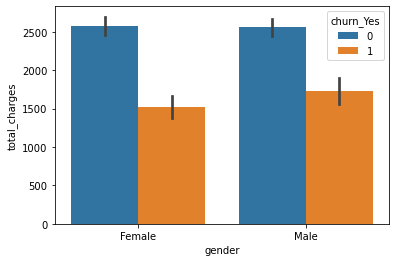

In [47]:
sns.barplot(x='gender',y='total_charges',data=tl_train,hue='churn_Yes')

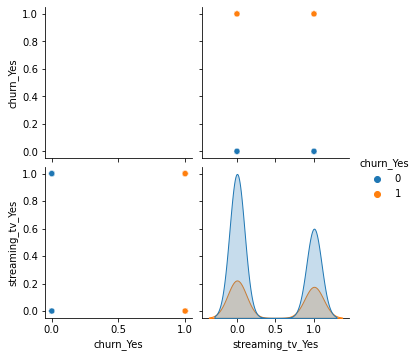

In [48]:
sns.pairplot(data=tl_train, hue="churn_Yes", vars=['churn_Yes','streaming_tv_Yes'])

<AxesSubplot:xlabel='churn_Yes', ylabel='total_charges'>

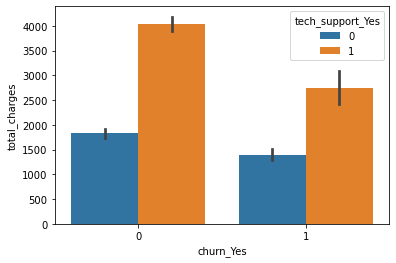

In [49]:
sns.barplot(data=tl_train, x="churn_Yes", y="total_charges",hue='tech_support_Yes')

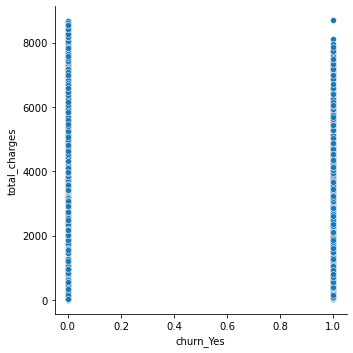

In [50]:
sns.relplot(data=tl_train, x="churn_Yes", y="total_charges")

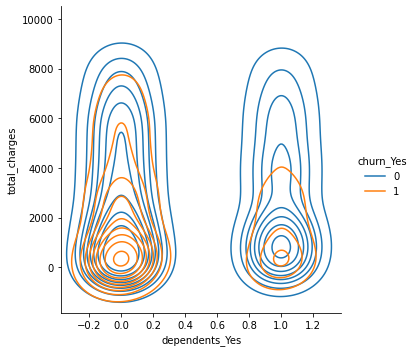

In [51]:
sns.displot(tl_train, x="dependents_Yes", y="total_charges", hue="churn_Yes", kind="kde")

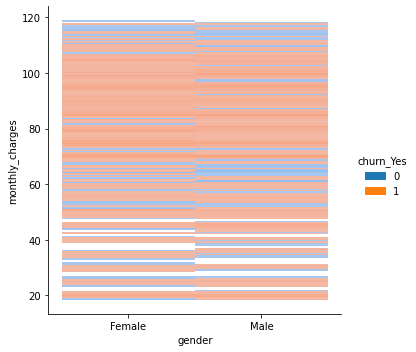

In [52]:
sns.displot(tl_train, x="gender", y="monthly_charges", hue='churn_Yes',binwidth=(2, .5))

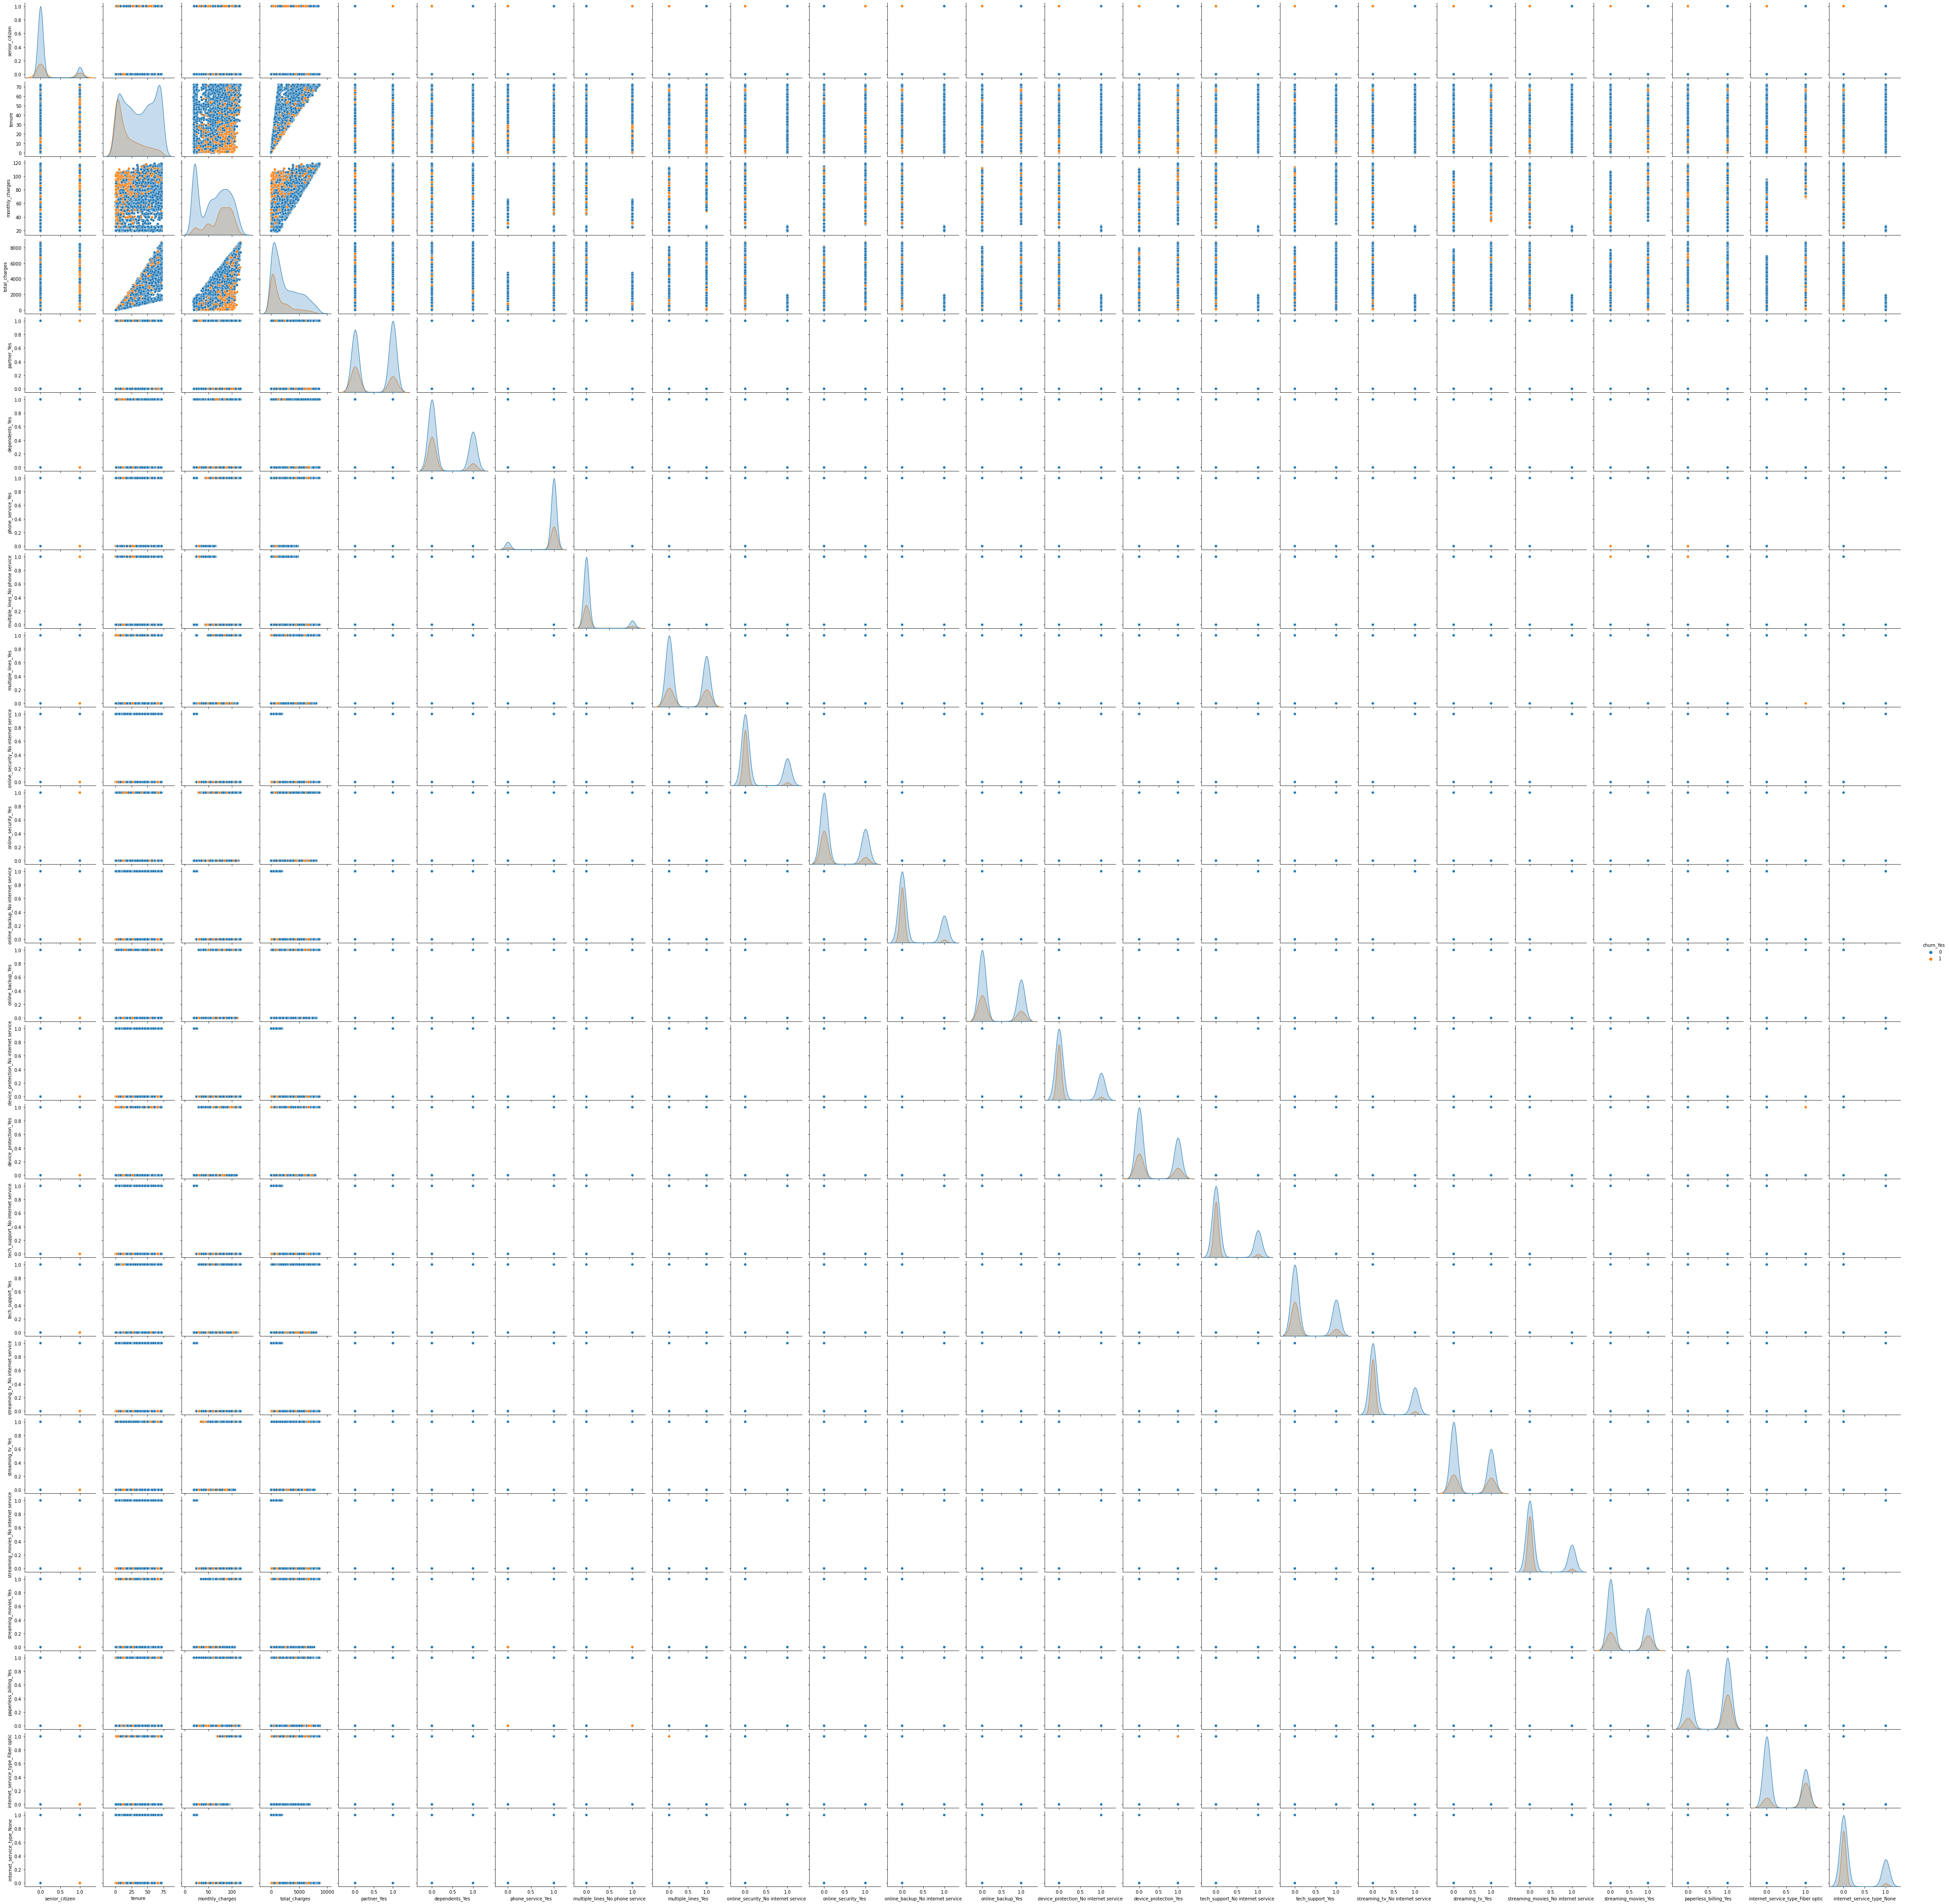

In [79]:
sns.pairplot(tl_train,hue='churn_Yes')

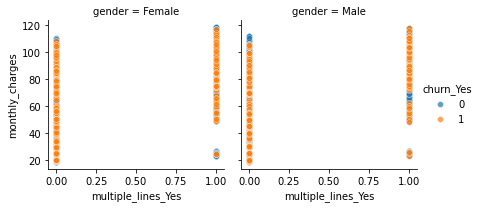

In [54]:
g = sns.FacetGrid(tl_train, col="gender", hue="churn_Yes")
g.map(sns.scatterplot, "multiple_lines_Yes", "monthly_charges", alpha=.7)
g.add_legend()

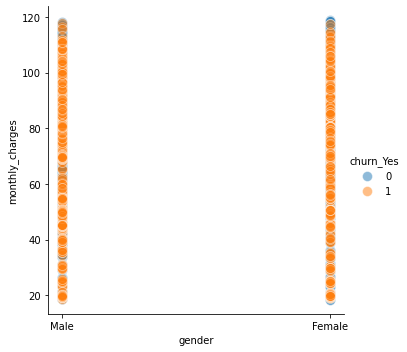

In [55]:
pal= dict(Churn='1')
g = sns.FacetGrid(tl_train, hue="churn_Yes", height=5)
g.map(sns.scatterplot, "gender", "monthly_charges", s=100, alpha=.5)
g.add_legend()

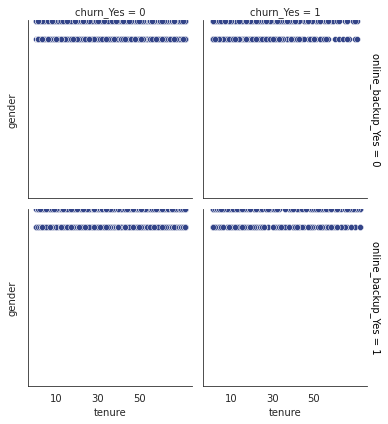

In [91]:
with sns.axes_style("white"):
    g = sns.FacetGrid(tl_train, row="online_backup_Yes", col="churn_Yes", margin_titles=True)
g.map(sns.scatterplot, "tenure", "gender", color="#334488")
g.set_axis_labels("tenure", "gender")
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10])
g.figure.subplots_adjust()